In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [24]:
#载入数据
data=np.genfromtxt(r"Delivery.csv",delimiter=",")
print(data)
x_data=data[:,0:2]
y_data=data[:,2]
print(x_data)
print(y_data)

[[100.    4.    9.3]
 [ 50.    3.    4.8]
 [100.    4.    8.9]
 [100.    2.    6.5]
 [ 50.    2.    4.2]
 [ 80.    2.    6.2]
 [ 75.    3.    7.4]
 [ 65.    4.    6. ]
 [ 90.    3.    7.6]
 [ 90.    2.    6.1]]
[[100.   4.]
 [ 50.   3.]
 [100.   4.]
 [100.   2.]
 [ 50.   2.]
 [ 80.   2.]
 [ 75.   3.]
 [ 65.   4.]
 [ 90.   3.]
 [ 90.   2.]]
[9.3 4.8 8.9 6.5 4.2 6.2 7.4 6.  7.6 6.1]


In [25]:
#学习率
lr=0.0001
#参数
k1=0
k2=0
#初始截距
b=0
#最大迭代次数
epochs=1000

#最小二乘法
def compute_error(b,k1,k2,x_data,y_data):
    totalError=0
    for i in range(0,len(x_data)):
        totalError+=(y_data[i]-(k1*x_data[i,0]+k2*x_data[i,1]+b))**2    #求代价函数
    return totalError/float(len(x_data))/2

def gradient_descent_runner(x_data,y_data,b,k1,k2,lr,epochs):
    #计算总数据量
    m=float(len(x_data))
    #循环epochs次
    for i in range(epochs):
        b_grad=0
        k1_grad=0
        k2_grad=0
        #计算梯度的总和再求平均
        for j in range(0,len(x_data)):
            b_grad += (1/m)*(((k1*x_data[j,0])+(k2*x_data[j,1])+b)-y_data[j])
            k1_grad += (1/m)*x_data[j,0]*(((k1*x_data[j,0])+(k2*x_data[j,1])+b)-y_data[j])
            k2_grad += (1/m)*x_data[j,1]*(((k1*x_data[j,0])+(k2*x_data[j,1])+b)-y_data[j])
        #更新b和k
        b=b-(lr*b_grad)
        k1=k1-(lr*k1_grad)
        k2=k2-(lr*k2_grad)
    return b,k1,k2       

In [26]:
print("Starting b = {0}, k1 = {1}, k2 = {2}, error = {3}".format(b, k1, k2 , compute_error(b, k1, k2, x_data, y_data)))
print("Running...")
b, k1 ,k2 = gradient_descent_runner(x_data, y_data, b, k1 , k2, lr, epochs)
print("After {0} iterations b = {1}, k1 = {2}, k2 = {3} ,error = {4}".format(epochs, b, k1,k2 ,compute_error(b, k1, k2 ,x_data, y_data)))

Starting b = 0, k1 = 0, k2 = 0, error = 23.639999999999997
Running...
After 1000 iterations b = 0.006971416196678632, k1 = 0.08021042690771771, k2 = 0.07611036240566814 ,error = 0.3865635716109059


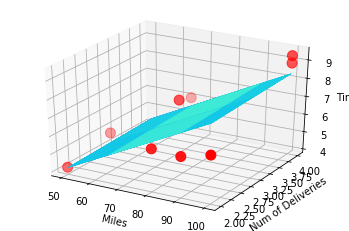

In [56]:
ax = plt.figure().add_subplot(111, projection = '3d') 
ax.scatter(x_data[:,0], x_data[:,1], y_data, c = 'r', marker = 'o', s = 100) #点为红色三角形  
x0 = x_data[:,0]
x1 = x_data[:,1]
# 生成网格矩阵
x0, x1 = np.meshgrid(x0, x1)
z = b + x0*k1 + x1*k2
# 画3D图
ax.plot_surface(x0,x1,z,rstride=1,cstride=1,cmap=plt.get_cmap('rainbow'))  #camp用来表示颜色     rstride,cstride用于改变色块大小
#设置坐标轴  
ax.set_xlabel('Miles')  
ax.set_ylabel('Num of Deliveries')  
ax.set_zlabel('Time')  
  
#显示图像  
plt.show()  